In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve,classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading Data

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')

In [3]:
test_df = pd.read_csv('test_lAUu6dG.csv')

In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.drop('Loan_ID',inplace=True,axis=1)
test_df.drop('Loan_ID',inplace=True,axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


### Missing Values
Before we go on to build the model, we must look for missing values within the dataset as treating the missing values  is a necessary step before we fit a logistic regression model on the dataset.

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Gender attribute

In [11]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'Gender': dict_gender}, inplace = True)

df['Gender'] = df['Gender'].fillna(1)

In [13]:
test_df.replace({'Gender': dict_gender}, inplace = True)

test_df['Gender'] = test_df['Gender'].fillna(1)

### Dependants

In [14]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df.Dependents = df.Dependents.fillna('0')
test_df.Dependents = test_df.Dependents.fillna('0')

In [16]:
df.Dependents = df.Dependents.apply(lambda x: x.split('+')[0] if x == '3+' else x).astype(int)
test_df.Dependents = test_df.Dependents.apply(lambda x: x.split('+')[0] if x == '3+' else x).astype(int)

### self employment

In [17]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
#Convert Self Employed
df.replace({'Self_Employed': {'No': 1, 'Yes':0}}, inplace = True)

df['Self_Employed'] = df['Self_Employed'].fillna(1)

test_df.replace({'Self_Employed': {'No': 1, 'Yes':0}}, inplace = True)

test_df['Self_Employed'] = test_df['Self_Employed'].fillna(1)

### LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

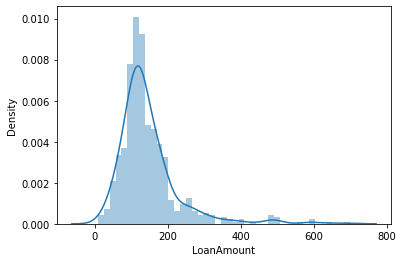

In [19]:
sns.distplot(df.LoanAmount)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            611 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 55.3+ KB


In [21]:
df[df.LoanAmount.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,Graduate,1.0,5849,0.0,NaN,360.0,1.0,Urban,Y
35,1.0,Yes,0,Graduate,1.0,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,1.0,Yes,1,Graduate,1.0,4945,0.0,NaN,360.0,0.0,Rural,N
81,1.0,Yes,1,Graduate,0.0,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,1.0,No,0,Graduate,1.0,6782,0.0,NaN,360.0,NaN,Urban,N
102,1.0,Yes,0,Graduate,1.0,13650,0.0,NaN,360.0,1.0,Urban,Y
103,1.0,Yes,0,Graduate,1.0,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,0.0,No,1,Graduate,0.0,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,1.0,No,0,Graduate,1.0,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,1.0,Yes,3,Not Graduate,1.0,3992,0.0,NaN,180.0,1.0,Urban,N


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    float64
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    int32  
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    float64
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 30.2+ KB


In [23]:
mask1 = df.LoanAmount.isnull()
df.loc[mask1, 'LoanAmount'] = df.LoanAmount.mean()


In [24]:
test_df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)

### Loan Amount Term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

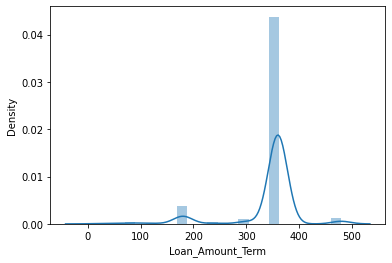

In [25]:
sns.distplot(df.Loan_Amount_Term)

In [26]:
df.Loan_Amount_Term.mean()

342.0

In [27]:
mask4 = df.Loan_Amount_Term.isnull()
df.loc[mask4, 'Loan_Amount_Term'] = df.Loan_Amount_Term.mean()

In [28]:
test_df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)

In [29]:
test_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

### Credit History

In [30]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [31]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

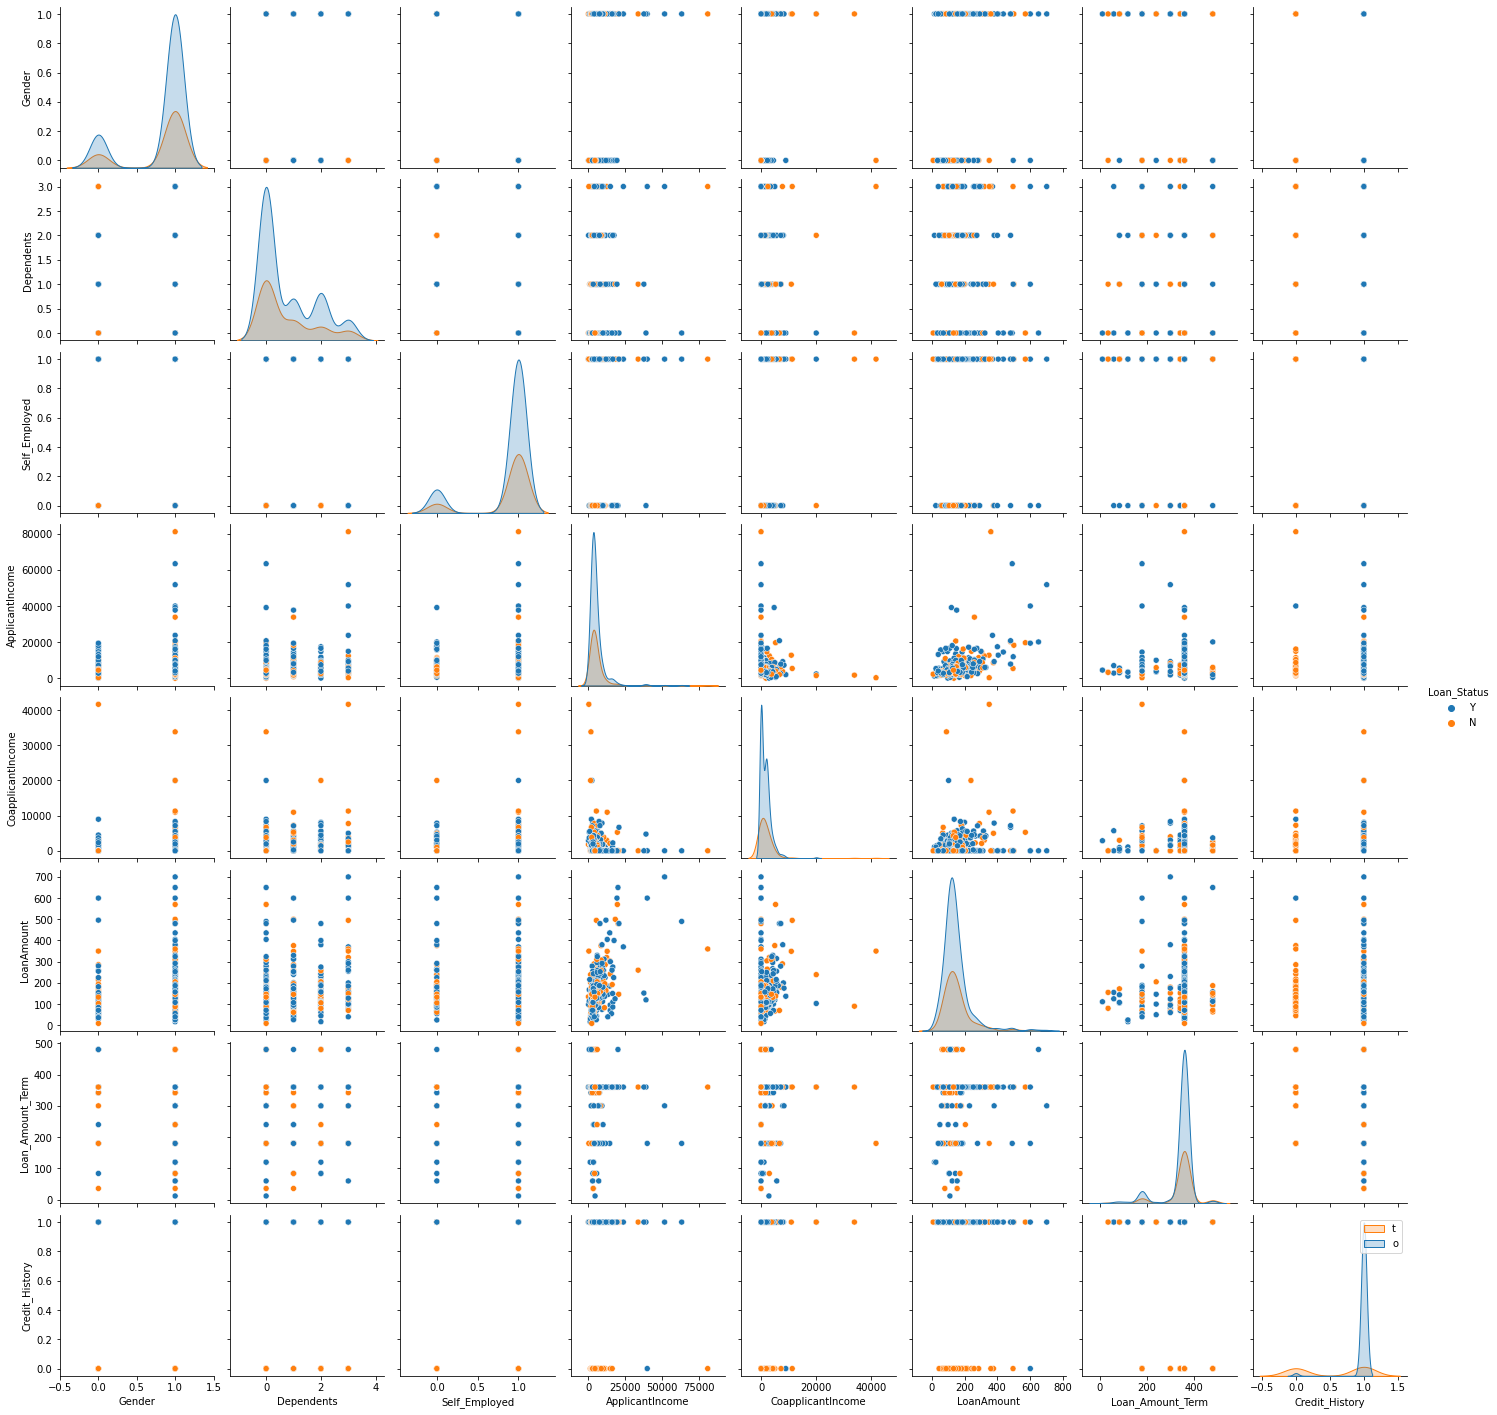

In [32]:
sns.pairplot(df,hue='Loan_Status')
plt.legend('topright')

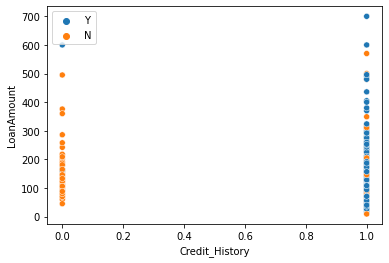

In [33]:
sns.scatterplot(x=df['Credit_History'],y=df['LoanAmount'],hue=df['Loan_Status'])
plt.legend()

In [34]:
mask5 = df.Credit_History.isnull()
df.loc[mask5, 'Credit_History'] = '1.0'


test_df.loc[test_df.Credit_History.isnull(), 'Credit_History'] = '1.0'

In [35]:

dict_Credit_History = {'1.0': 1, '0.0':0}
df.replace({'Credit_History': dict_Credit_History}, inplace = True)

test_df.replace({'Credit_History': dict_Credit_History}, inplace = True)

In [36]:
dict_Married = {'Yes': 1, 'No':0}
df.replace({'Married': dict_Married}, inplace = True)

df['Married'] = df['Married'].fillna(1)

test_df.replace({'Married': dict_Married}, inplace = True)

In [37]:
dict_Education = {'Graduate': 1, 'Not Graduate':0}
df.replace({'Education': dict_Education}, inplace = True)

test_df.replace({'Education': dict_Education}, inplace = True)

In [38]:
dict_Property_Area = {'Semiurban': 1, 'Urban':2,'Rural':3}
df.replace({'Property_Area': dict_Property_Area}, inplace = True)

test_df.replace({'Property_Area': dict_Property_Area}, inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(7), int32(1), int64(3), object(1)
memory usage: 55.3+ KB


In [40]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.866450,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.912052
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.815081
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000


In [41]:
scale = StandardScaler()

In [42]:
y = df.pop('Loan_Status')
x = df

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    float64
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int32  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    float64
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 30.2 KB


In [44]:
x_scale = scale.fit_transform(x)

x_test = scale.fit_transform(test_df)

In [45]:
df.index

RangeIndex(start=0, stop=614, step=1)

In [46]:
x_scale = pd.DataFrame(x_scale,columns=x.columns,index = df.index)

x_test = pd.DataFrame(x_test,columns=x.columns)

In [47]:
x_train, x_val, y_train, y_val = train_test_split(x_scale, y , test_size=0.3, random_state=2227)

In [48]:
x_train.shape,y_train.shape

((429, 11), (429,))

In [49]:
x_val.shape,y_val.shape

((185, 11), (185,))

### Model Building

In [50]:
model_logistic = LogisticRegression()

In [51]:
model_logistic.fit(x_train, y_train)

LogisticRegression()

In [52]:
y_pred_train = model_logistic.predict(x_train)

In [53]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           N       0.93      0.44      0.60       130
           Y       0.80      0.99      0.88       299

    accuracy                           0.82       429
   macro avg       0.87      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429



In [54]:
accuracy_score(y_train,y_pred_train)

0.8205128205128205

In [55]:
print(classification_report(y_val,model_logistic.predict(x_val)))

              precision    recall  f1-score   support

           N       0.88      0.47      0.61        62
           Y       0.78      0.97      0.87       123

    accuracy                           0.80       185
   macro avg       0.83      0.72      0.74       185
weighted avg       0.82      0.80      0.78       185



In [56]:
act_test_pred = model_logistic.predict(x_test)

In [57]:
submission_test = pd.DataFrame({'Loan_ID':test_df.index,'Loan_Status':act_test_pred})

In [58]:
submission_test.to_csv('LogisticRegressionResult.csv',index =False)

## Cross Validation

In [59]:
def cv_score(model, data,target, state = 22, thres = 0.5 ,colnames = df.columns, k = 5) :

    i = 1
    cv_scores = []
    df = data[colnames]
    y = target

    ## K fold cross validation on the basis of target values
    kf = StratifiedKFold(n_splits=k , random_state = state , shuffle = True)
    for df_index, val_index in kf.split(df,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        x_train , x_val = df.loc[df_index],df.loc[val_index]
        y_train , y_val = y.loc[df_index],y.loc[val_index]

        ## Defining a model to fit training set for each fold
        model = model
        model.fit(x_train ,y_train)
        y_pred_train = model.predict(x_train)
        y_pred_val = model.predict(x_val)


        classification_Report_Train = classification_report(y_train , y_pred_train)
        classification_Report_Val = classification_report(y_val , y_pred_val)

        accuracy_train = accuracy_score(y_train , y_pred_train)
        accuracy_val   = accuracy_score(y_val , y_pred_val)

       ## print("{}".format(classification_Report_Train))
        print("{}".format(classification_Report_Val))

        ## Score save
        cv_scores.append([accuracy_train , accuracy_val])
        i+=1
    return cv_scores

In [60]:
cv_score(LogisticRegression(),data =x_scale,target =y,colnames=x_scale.columns)


1 of kfold 5
              precision    recall  f1-score   support

           N       0.91      0.53      0.67        38
           Y       0.82      0.98      0.89        85

    accuracy                           0.84       123
   macro avg       0.87      0.75      0.78       123
weighted avg       0.85      0.84      0.82       123


2 of kfold 5
              precision    recall  f1-score   support

           N       0.86      0.32      0.46        38
           Y       0.76      0.98      0.86        85

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.66       123
weighted avg       0.79      0.77      0.73       123


3 of kfold 5
              precision    recall  f1-score   support

           N       0.95      0.46      0.62        39
           Y       0.80      0.99      0.88        84

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.85      0.8

[[0.8024439918533605, 0.8373983739837398],
 [0.8207739307535642, 0.7723577235772358],
 [0.8085539714867617, 0.8211382113821138],
 [0.8126272912423625, 0.8130081300813008],
 [0.8130081300813008, 0.8114754098360656]]

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import cross_val_score,GridSearchCV

In [75]:
modelKnn = KNeighborsClassifier()
modelDT = DecisionTreeClassifier()
modelRF = RandomForestClassifier()

In [85]:
clf = LogisticRegression()
grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25]}


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
             scoring='accuracy')

In [98]:
clf = DecisionTreeClassifier(random_state=1024)
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

In [99]:
grid_clf_acc = GridSearchCV(clf, param_grid = param_grid,scoring = 'accuracy')
grid_clf_acc.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [100]:
accuracy_score(y_train,grid_clf_acc.predict(x_train))

0.8275058275058275

In [101]:
accuracy_score(y_val,grid_clf_acc.predict(x_val))

0.772972972972973

In [77]:
cv_score(modelDT,data =x_scale,target =y,colnames=x_scale.columns)


1 of kfold 5
              precision    recall  f1-score   support

           N       0.49      0.58      0.53        38
           Y       0.79      0.73      0.76        85

    accuracy                           0.68       123
   macro avg       0.64      0.65      0.65       123
weighted avg       0.70      0.68      0.69       123


2 of kfold 5
              precision    recall  f1-score   support

           N       0.49      0.45      0.47        38
           Y       0.76      0.79      0.77        85

    accuracy                           0.68       123
   macro avg       0.62      0.62      0.62       123
weighted avg       0.68      0.68      0.68       123


3 of kfold 5
              precision    recall  f1-score   support

           N       0.51      0.49      0.50        39
           Y       0.77      0.79      0.78        84

    accuracy                           0.69       123
   macro avg       0.64      0.64      0.64       123
weighted avg       0.69      0.6

[[1.0, 0.6829268292682927],
 [1.0, 0.6829268292682927],
 [1.0, 0.6910569105691057],
 [1.0, 0.6666666666666666],
 [1.0, 0.7540983606557377]]

In [61]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(x_scale, y)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [62]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = x_scale.columns
ranking_df['Rank'] = rfe.ranking_

In [63]:
ranked = ranking_df.sort_values(by=['Rank'])
ranked

,Feature_name,Rank
9,Credit_History,1
10,Property_Area,2
1,Married,3
6,CoapplicantIncome,4
3,Education,5
7,LoanAmount,6
5,ApplicantIncome,7
8,Loan_Amount_Term,8
2,Dependents,9
4,Self_Employed,10


In [64]:
rfe_top_10_scores = cv_score(LogisticRegression(),data = x_scale,target=y ,colnames = ranked['Feature_name'][:8].values)


1 of kfold 5
              precision    recall  f1-score   support

           N       0.95      0.53      0.68        38
           Y       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123


2 of kfold 5
              precision    recall  f1-score   support

           N       0.86      0.32      0.46        38
           Y       0.76      0.98      0.86        85

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.66       123
weighted avg       0.79      0.77      0.73       123


3 of kfold 5
              precision    recall  f1-score   support

           N       0.95      0.46      0.62        39
           Y       0.80      0.99      0.88        84

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.85      0.8

In [65]:
##thres=0.14

rfe_top_10_scores

[[0.8044806517311609, 0.8455284552845529],
 [0.8207739307535642, 0.7723577235772358],
 [0.8085539714867617, 0.8211382113821138],
 [0.8126272912423625, 0.8130081300813008],
 [0.8130081300813008, 0.8114754098360656]]

In [66]:
def minion(s):
    
    vowels = ['A','E','I','O','U']

    kevsc = 0
    stusc = 0
    for i in range(len(s)):
        if s[i] in vowels:
            kevsc += (len(s)-i)
        else:
            stusc += (len(s)-i)

    if kevsc > stusc:
        print ("Kevin", kevsc)
    elif kevsc < stusc:
        print ("Stuart", stusc)
    else:
        print ("Draw")


In [67]:
def merge_the_tools(string, k):
    s = string
    l = int(len(s)/k)
    a=[]
    k,kk = '',[]
    for i in range(0,len(s),l):
        a.append(s[i:i+l])
        
    for i in a:
        for j in i:
            if j not in k:
                k = k+j
        print(k)
        k = ''

In [68]:
merge_the_tools('AABCAAADA',3)

AB
CA
AD


In [69]:
s = 'AABCAAADA'
k = 3
l = int(len(s)/k)
k = ''



for i in [s[i:i+l] for i in range(0,len(s),l)]:
    for j in i:
        if j not in k:
            k = k+j
    print(k)
    k = ''


AB
CA
AD


In [70]:
def kk(o):
    k=''
    for j in i:
        if j not in k:
            k = k+j
    print(k)
    k = ''

In [71]:
vv= (lambda x: kk(x), [s[i:i+l] for i in range(0,len(s),l)])

In [72]:
S, N = 'AABCAAADA',3
for part in zip(*[iter(S)] * N):
    d = dict()
    print(''.join([ d.setdefault(c, c) for c in part if c not in d ]))

AB
CA
AD


In [73]:
for part in zip(*[iter(S)] * N):
    print(part)

('A', 'A', 'B')
('C', 'A', 'A')
('A', 'D', 'A')
